### The original article can be found [here](http://krasserm.github.io/2018/03/19/gaussian-processes/)

# Parametric methods

In supervised learning, we often use parametric models $E(Y|X,\theta)$ to explain data and infer optimal values of parameter $\theta$ via maximum likelihood or maximum a posteriori estimation. If needed we can also infer a full posterior distribution $E(\theta|X,Y)$ instead of a point estimate $\hat{\theta}$. Parametric methods are those methods that have a fixed number of parameters in such a model.

# Non-Parametric methods and Kernel regression

With increasing data complexity, models with a higher number of parameters are usually needed to explain data reasonably well. Therefore, in non-parametric methods, the number of parameters depend on the dataset size.

$\textbf{Kernel regression}$ is a non-parametric technique in statistics to estimate the conditional expectation of a random variable Y, relative to another random variable X, i.e, $E(Y|X) = m(X)$, where m is an unknown function. The objective is to find a non-linear relation between the variables X and Y. 

## Nadaraya–Watson kernel regression
The technique is used to estimate $m$ as a locally weighted average, using a kernel as a weighting function: 
 $\widehat {m}_{h}(x)={\frac {\sum _{i=1}^{n}K_{h}(x-x_{i})y_{i}}{\sum _{j=1}^{n}K_{h}(x-x_{j})}}$, where $K_{h}$ is a kernel with a bandwidth $h$. See wikipedia for [details](https://en.wikipedia.org/wiki/Kernel_regression).
 
Therefore, for a target value at a new point $x$, a weight $w_i$ is assigned to each observed target $y_i$.

\begin{equation*} f(x) = \frac {\sum_{i=1}^N \kappa(x,x_i) y_i}{\sum_{i^{\prime}=1}^N \kappa(x,x_{i^{\prime}})}  = \sum_{i=1}^N w_i(x)y_i \end{equation*} where

\begin{equation*} w_i(x)=\frac{\kappa(x,x_i)}{\sum_{i^{\prime}=1}^N \kappa(x,x_{i^{\prime}})} \end{equation*}
 
For predicting the target value a weighted average is computed. Observations that are closer to $x$ have a higher weight than observations that are further away. Weights are computed from $x$ and observed $x_i$ with a kernel $\kappa$. This is what we use in neural networks.

 ## Gaussian Processes
In probability theory and statistics, a Gaussian process is a stochastic process, such that every finite linear combination (joint distribution) of (infinitely many) random variables in the process is normally distributed. Therefore, instead of inferring a distribution over the $\underline{\mathrm{parameters~of~a~function}}$, Gaussian processes can be used to infer a distribution over $\underline{\mathrm{functions}}$ directly. See an excellent explainationary video by Richard Turner [here](https://www.youtube.com/watch?v=92-98SYOdlY).

In the following left image, one can infer the value of $y_2$ at $y_1 = 1$ (conditon) by forming the density along the slice at $y_1 = 1$,  which is another gaussian distribution. The mean $\mu_*$ is linearly dependent on the data. Now, if we do samplign operation on $y_2$ for the condition $y_1 = 1$, we get samples around the mean and speads out around the size of the width $W$ as shown in right plot.
<table>
<tr>
<td> <img src="img/gp_2D.jpg" alt="Drawing" style="width: 270px;"/> </td>
<td> <img src="img/gp_2D_sampling.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>
</table>

The left figure below shows that data sample can be written in a new representation, such as we can project $y_1$ and $y_2$ to a new axis which is dimensional index of the Gaussian. One can visualze the sampling operation in this new representation, such as the bar will move together for every random sample around the mean of the gaussain, but due to correlation it can move in different directions. If we put a condition $y_1 = 1$, then one end of it will be fixed and other will wiggle for samples generated along $y_1 = 1$. The right plot is the visualization for a $20 \times 20$ covariance matrix, where one can see how a complex scatter data can be represented by a non-linear curve. 

<table>
<tr>
<td> <img src="img/gp_2D_new_visulatization.jpg" alt="Drawing" style="width: 270px;"/> </td>
<td> <img src="img/gp_2D_new_visulatization_20.jpg" alt="Drawing" style="width: 290px;"/> </td>
</tr>
</table>

In left figure, values of the first two variables are fixed, and one can sample on rest of the variables. The average over all such samples will is shown in right figure, with mean and variance $\mu_*$ and $\Sigma_*$, which shows that the first few points are not so correlated, but as we move apart, the correlation increases. Now, this looks much like a non-linear regression problem.

<table>
<tr>
<td> <img src="img/gp_2D_new_visulatization_20_cond2.jpg" alt="Drawing" style="width: 290px;"/> </td>
<td> <img src="img/gp_2D_mean.jpg" alt="Drawing" style="width: 290px;"/> </td>
</tr>
</table>

The left plot below shows the non-linear curve for three known values of random variables, which looks like a Guassian distribution. The kernel, $K(X_1, X_2)$ has variance $\sigma$ and is multiplied by a Gaussain term, such that it generates infinitesimal points in space based on size of $X_1$ and $X_2$. Therefore, in right plot the covariance matrix has infinte number of dimensions that we intergate over. For regression, the input value $X$ can have now decimal values. So, now a non-parametric function is transformed into a parametric function.

<table>
<tr>
<td> <img src="img/gp_2D_kernel.jpg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="img/gp_2D_kernel_smooth.jpg" alt="Drawing" style="width: 290px;"/> </td>
</tr>
</table>

A Gaussian process is a random process where any point $x \in \mathbb{R}^d$ is assigned a random variable $f(x)$ and where the joint distribution of a finite number of these variables $p(f(x_1),...,f(x_N))$ is itself Gaussian:
 
$$p(f \lvert X) = \mathcal{N}(f \lvert \mu, K)\tag{1}\label{eq1}$$

In Equation $(1)$, $f = (f(x_1),...,f(x_N))$, $\mu = (m(x_1),...,m(x_N))$ and $K_{ij} = \kappa(x_i,x_j)$, where $m$ is the mean function and $\kappa$ is a positive definite *kernel function* or *covariance function*. Thus, a Gaussian process is a distribution over functions whose shape (smoothness, ...) is defined by $K$. If points $x_i$ and $x_j$ are considered to be similar by the kernel the function values at these points, $f(x_i)$ and $f(x_j)$, can be expected to be similar too. 


 #### A GP defines a prior $p(f \lvert X)$ over functions, and after having observed some function values it can be converted into a posterior $p(f \lvert X,y)$ over functions after having observed some data $y$. The posterior can then be used to make predictions $f_*$ given new input $X_*$:
 
$$
 \begin{align*}
  p(f_* \lvert X_*,X,y) 
  &= \int{p(f_* \lvert X_*, f)p(f \lvert X,y)}\ d f \\ 
  &= \mathcal{N}(f_* \lvert \mu_*, \Sigma_*)\tag{2}\label{eq2}
 \end{align*}
 $$
 
Equation $(2)$ is the posterior predictive distribution which is also a Gaussian with mean $\mu_*$ and $\Sigma_*$. By definition of the GP, the joint distribution of observed data $y$ and predictions $f_*$  is

$$
 \begin{pmatrix} y \\ f_*\end{pmatrix} \sim \mathcal{N}
 \left( 0,
 \begin{pmatrix}K_y & K_* \\ K_*^T & K_{**}\end{pmatrix}
 \right)\tag{3}\label{eq3}
$$
 
 
 Inference of continuous function values in this context is known as GP regression but GPs can also be used for classification. Hence it is a powerful non-linear interpolation tool.

With $N$ training data and $N_*$ new input data, $K_y = \kappa(X,X) + \sigma_y^2 I = K + \sigma_y^2 I$ is $N \times N$, $K_* = \kappa(X,X_*)$ is $N \times N_*$ and $K_{**} = \kappa(X_*,X_*)$ is $N_* \times N_*$ matrix. The symbol $\sigma_y^2$ is the noise term in the diagonal of $\mathbf{K_y}$. It is set to zero if training targets are noise-free and to a value greater than zero if observations are noisy. The mean is set to $0$ for notational simplicity. The sufficient statistics of the posterior predictive distribution, $\mu_*$ and $\Sigma_*$, can be computed with

$$
 \begin{align*}
 \mu_* &= K_*^T K_y^{-1} y\tag{4}\label{eq4} \\
 \Sigma_* &= K_{**} - K_*^T K_y^{-1} K_*\tag{5}\label{eq5}
 \end{align*}
 $$ 

## Implementation with NumPy

Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel or $\textbf{bivariate normal joint density function}$:
 
 $$
 \kappa(x_i,x_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
   (x_i - x_j)^T
   (x_i - x_j))\tag{6}
 $$

 The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel). 

In [202]:
import numpy as np

def kernel(X1, X2, l=2.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    ''' 
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T) # (m x n) matrix
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

### Prior

Let's first define a prior over functions with mean zero and a covariance matrix computed with kernel parameters $l=1$ and $\sigma_f=1$. To draw random functions from that GP we draw random samples from the corresponding multivariate normal. The following example draws three random samples and plots it together with the zero mean and the 95% confidence interval (computed from the diagonal of the covariance matrix).

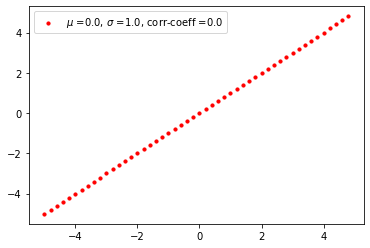

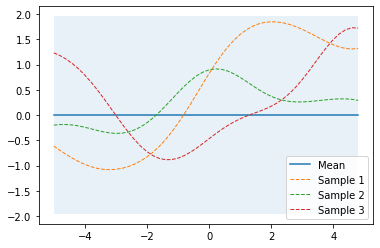

In [203]:
%matplotlib inline

from gaussian_processes_util import plot_gp #*

def plot_scatter(mu, cov, X):
    mu_val  =  mu.ravel()[0]
    sig_val =  cov.item((0,0))
    cor_coeff =  cov.item((0,X.shape[0]-1))
    plt.scatter(X, X, color='red', s=10, marker='o', label="$\mu$ ="+str(mu_val)+
                ", $\sigma$ ="+str(round(sig_val,2))+", corr-coeff ="+str(round(cor_coeff,2)))
    plt.legend(loc='upper left')
    plt.show()

# Finite number of (50) points b/w -5 and 5 in a column
X = np.arange(-5.0, 5.0, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape) 
cov = kernel(X, X)
#print ('mean:\n', mu, '\n cov: \n', cov)

plot_scatter(mu, cov, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

#print (samples)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

### Prediction from noise-free training data

To compute the sufficient statistics i.e. mean and covariance of the posterior predictive distribution we implement Equations $(4)$ and $(5)$ and apply them to noise-free training data `X_train` and `Y_train`. The following example draws three samples from the posterior predictive and plots them along with the mean, confidence interval and training data. In a noise-free model, variance ($\sigma_y$) at the training points is zero and all random functions drawn from the posterior go through the trainig points.
 $$
 \begin{align*}
 \mu_* &= K_*^T K_y^{-1} y\tag{4}\label{eq4} \\
 \Sigma_* &= K_{**} - K_*^T K_y^{-1} K_*\tag{5}\label{eq5}
 \end{align*}
 $$ 

In [224]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

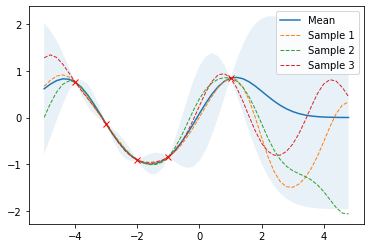

In [196]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

### Prediction from noisy training data
 
If some noise is included in the model, training points are only approximated and the variance at the training points is non-zero.

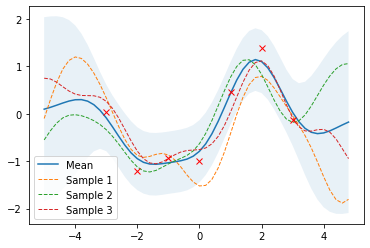

In [197]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)


### Effect of kernel parameters and noise parameter
 
The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

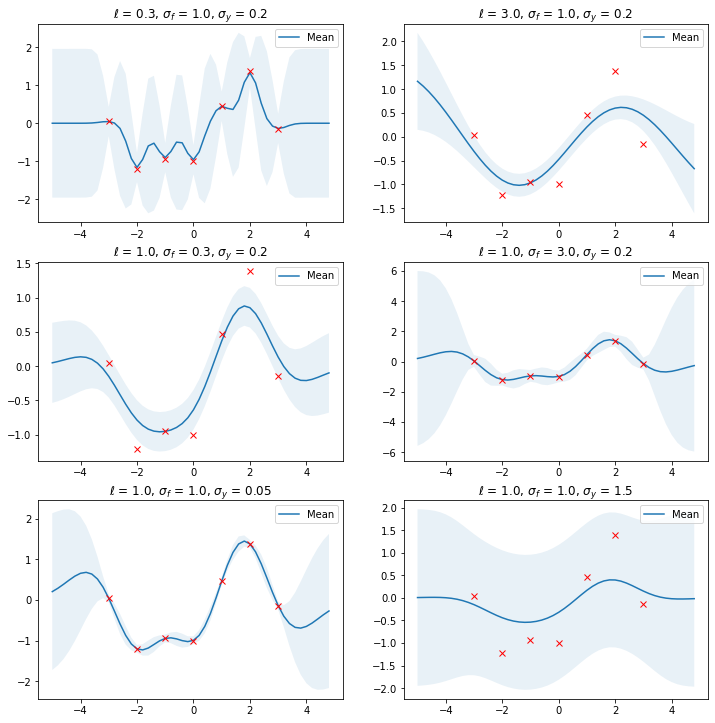

In [201]:
import matplotlib.pyplot as plt

# l, sigma_f, sigma_l
params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'$\ell$ = {l}, $\sigma_f$ = {sigma_f}, $\sigma_y$ = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)


### Optimization of Parameters
Optimal values for these parameters can be estimated by maximizing the marginal log-likelihood which is given by

 $$
 \log p(\mathbf{y} \lvert \mathbf{X}) = 
 \log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =
 -\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} 
 -\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} 
 -\frac{N}{2} \log(2\pi) \tag{7}
 $$
 
 In the following we will minimize the negative marginal log-likelihood w.r.t. parameters $l$ and $\sigma_f$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters. 


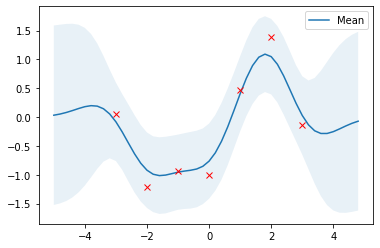

In [205]:
from numpy.linalg import cholesky
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise):
    '''
    Returns a function that computes the negative log-likelihood
    for training data X_train and Y_train and given noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        
    Returns:
        Minimization objective.
    '''
    def step(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        # Compute determinant via Cholesky decomposition
        return np.sum(np.log(np.diagonal(cholesky(K)))) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    return step

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

With optimized kernel parameters, training data are reasonably covered by the 95% confidence interval and the mean of the posterior predictive is a good approximation.